In [94]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [95]:
sales = pd.read_excel("Sales Data.xls")

In [96]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [97]:
sales.describe

<bound method NDFrame.describe of        Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0           1  US-2019-103800 2019-01-03 2019-01-07  Standard Class   
1           2  US-2019-112326 2019-01-04 2019-01-08  Standard Class   
2           3  US-2019-112326 2019-01-04 2019-01-08  Standard Class   
3           4  US-2019-112326 2019-01-04 2019-01-08  Standard Class   
4           5  US-2019-141817 2019-01-05 2019-01-12  Standard Class   
...       ...             ...        ...        ...             ...   
10189   10190  US-2022-143259 2022-12-30 2023-01-03  Standard Class   
10190   10191  US-2022-115427 2022-12-30 2023-01-03  Standard Class   
10191   10192  US-2022-156720 2022-12-30 2023-01-03  Standard Class   
10192   10193  US-2022-143259 2022-12-30 2023-01-03  Standard Class   
10193   10194  CA-2022-143500 2022-12-30 2023-01-03  Standard Class   

      Customer ID      Customer Name      Segment Country/Region  \
0        DP-13000      Darren Powers     Cons

In [98]:
sales['Quantity'].dtype

dtype('int64')

In [99]:
sales['Sales'].dtype

dtype('float64')

In [100]:
sales.info

<bound method DataFrame.info of        Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0           1  US-2019-103800 2019-01-03 2019-01-07  Standard Class   
1           2  US-2019-112326 2019-01-04 2019-01-08  Standard Class   
2           3  US-2019-112326 2019-01-04 2019-01-08  Standard Class   
3           4  US-2019-112326 2019-01-04 2019-01-08  Standard Class   
4           5  US-2019-141817 2019-01-05 2019-01-12  Standard Class   
...       ...             ...        ...        ...             ...   
10189   10190  US-2022-143259 2022-12-30 2023-01-03  Standard Class   
10190   10191  US-2022-115427 2022-12-30 2023-01-03  Standard Class   
10191   10192  US-2022-156720 2022-12-30 2023-01-03  Standard Class   
10192   10193  US-2022-143259 2022-12-30 2023-01-03  Standard Class   
10193   10194  CA-2022-143500 2022-12-30 2023-01-03  Standard Class   

      Customer ID      Customer Name      Segment Country/Region  \
0        DP-13000      Darren Powers     Consum

In [101]:
sales.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [102]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [103]:
sales['Segment'].value_counts()

Consumer       5281
Corporate      3090
Home Office    1823
Name: Segment, dtype: int64

In [104]:
sales['Segment'].value_counts()

Consumer       5281
Corporate      3090
Home Office    1823
Name: Segment, dtype: int64

In [105]:
sales['Category'].value_counts()

Office Supplies    6128
Furniture          2201
Technology         1865
Name: Category, dtype: int64

In [106]:
sales['Sub-Category'].value_counts()

Binders        1548
Paper          1384
Furnishings    1009
Phones          903
Storage         856
Art             821
Accessories     775
Chairs          634
Appliances      474
Labels          368
Tables          326
Envelopes       256
Bookcases       232
Fasteners       229
Supplies        192
Machines        117
Copiers          70
Name: Sub-Category, dtype: int64

In [107]:
sales['Ship Mode'].value_counts()

Standard Class    6120
Second Class      1979
First Class       1548
Same Day           547
Name: Ship Mode, dtype: int64

In [108]:
sales['Sales']

0         16.448
1          3.540
2         11.784
3        272.736
4         19.536
          ...   
10189     52.776
10190     20.720
10191      3.024
10192     90.930
10193      3.024
Name: Sales, Length: 10194, dtype: float64

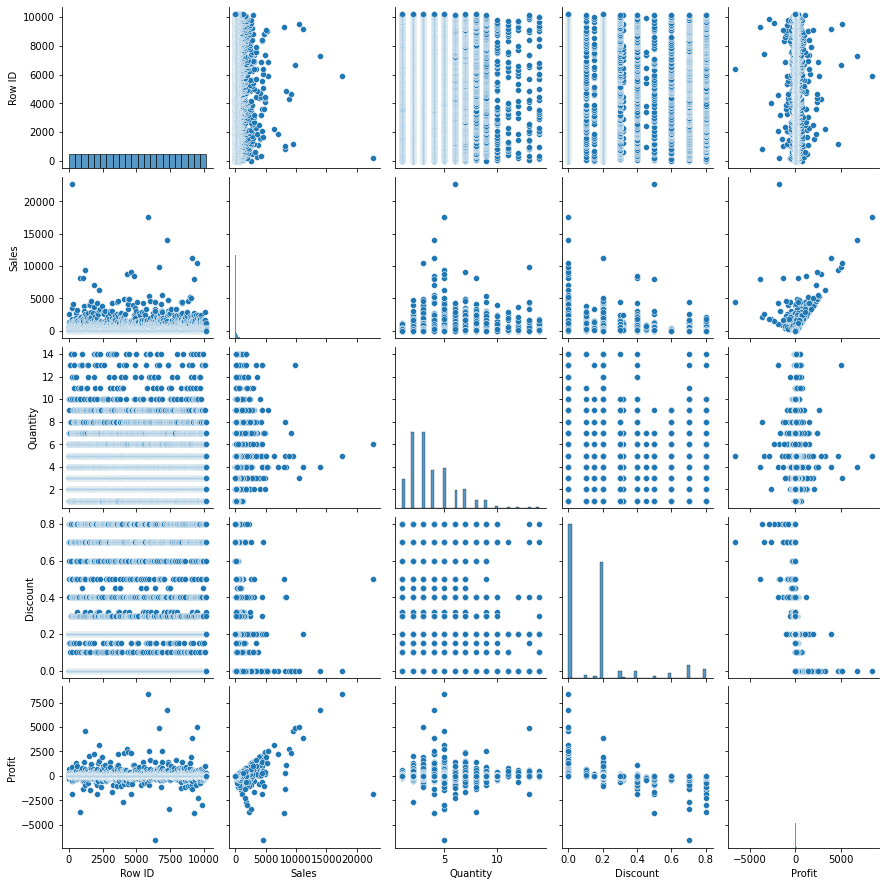

In [109]:
sns.pairplot(sales)

In [110]:
correlation_matrix=sales.corr()

In [111]:
print(correlation_matrix)

            Row ID     Sales  Quantity  Discount    Profit
Row ID    1.000000 -0.008958  0.000502 -0.001474  0.003022
Sales    -0.008958  1.000000  0.198457 -0.027756  0.481460
Quantity  0.000502  0.198457  1.000000  0.007475  0.066145
Discount -0.001474 -0.027756  0.007475  1.000000 -0.218882
Profit    0.003022  0.481460  0.066145 -0.218882  1.000000


<AxesSubplot:>

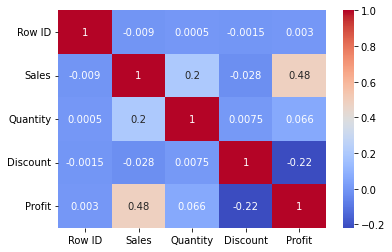

In [112]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [113]:
X = sales[['Quantity', 'Discount', 'Profit']]
y = sales['Sales']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [115]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [116]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared score
r2_score = model.score(X_test, y_test)
print("R-squared Score:", r2_score)


R-squared Score: 0.5090729713968583


In [117]:
categorical_columns = []
datetime_columns = []
numerical_columns = []

for column in sales.columns:
    if sales[column].dtype == 'object':
        categorical_columns.append(column)
    elif sales[column].dtype == 'datetime64[ns]':
        datetime_columns.append(column)
    else:
        numerical_columns.append(column)

print("Categorical Columns:", categorical_columns)
print("datetime_columns:",datetime_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City', 'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
datetime_columns: ['Order Date', 'Ship Date']
Numerical Columns: ['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit']


In [137]:
# Find categorical columns with less than 3 unique values
low_cardinality_categorical = []

for column in categorical_columns:
    unique_values = sales[column].nunique()
    if unique_values < 8:
        low_cardinality_categorical.append(column)

print("Categorical Columns with Low Cardinality (< 3 unique values):", low_cardinality_categorical)

Categorical Columns with Low Cardinality (< 3 unique values): ['Ship Mode', 'Segment', 'Country/Region', 'Region', 'Category']


In [119]:
sales['Country/Region'].value_counts()

United States    9994
Canada            200
Name: Country/Region, dtype: int64

In [120]:
sales['Segment'].value_counts()

Consumer       5281
Corporate      3090
Home Office    1823
Name: Segment, dtype: int64

In [121]:
sales['Category'].value_counts()

Office Supplies    6128
Furniture          2201
Technology         1865
Name: Category, dtype: int64

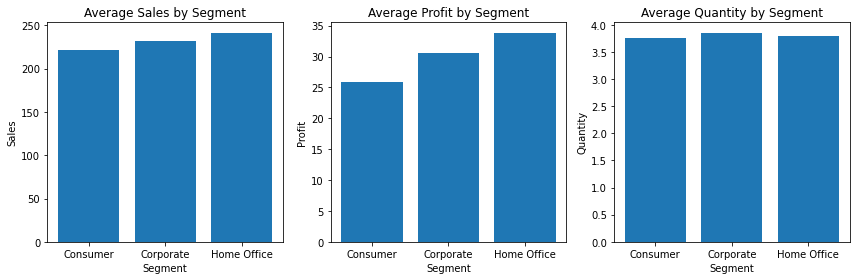

In [127]:
# Group data by 'Segment' and calculate mean values for 'Sales', 'Profit', and 'Quantity'
segment_data = sales.groupby('Segment')[['Sales', 'Profit', 'Quantity']].mean().reset_index()

# Create bar plots
plt.figure(figsize=(12, 4))

# Plot Sales
plt.subplot(131)
plt.bar(segment_data['Segment'], segment_data['Sales'])
plt.title('Average Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')

# Plot Profit
plt.subplot(132)
plt.bar(segment_data['Segment'], segment_data['Profit'])
plt.title('Average Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Profit')

# Plot Quantity
plt.subplot(133)
plt.bar(segment_data['Segment'], segment_data['Quantity'])
plt.title('Average Quantity by Segment')
plt.xlabel('Segment')
plt.ylabel('Quantity')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Ship Mode vs Sales')

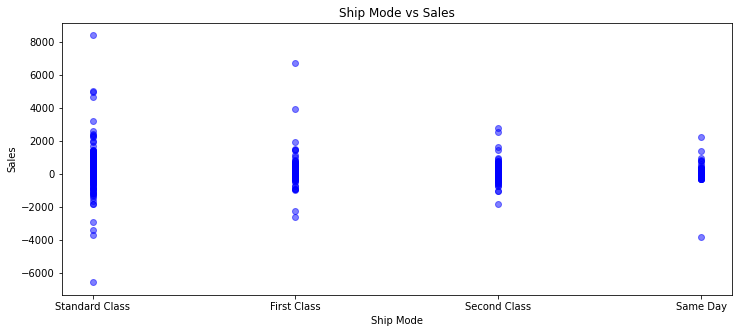

In [140]:
plt.figure(figsize=(12,5))
plt.scatter(sales['Ship Mode'],sales['Profit'], color='blue',alpha=0.5)
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.title('Ship Mode vs Sales')

In [79]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10194 non-null  int64         
 1   Order ID        10194 non-null  object        
 2   Order Date      10194 non-null  datetime64[ns]
 3   Ship Date       10194 non-null  datetime64[ns]
 4   Ship Mode       10194 non-null  object        
 5   Customer ID     10194 non-null  object        
 6   Customer Name   10194 non-null  object        
 7   Segment         10194 non-null  object        
 8   Country/Region  10194 non-null  object        
 9   City            10194 non-null  object        
 10  State/Province  10194 non-null  object        
 11  Postal Code     10194 non-null  object        
 12  Region          10194 non-null  object        
 13  Product ID      10194 non-null  object        
 14  Category        10194 non-null  object        
 15  Su

In [142]:
# Convert 'Order Date' to datetime format
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%d-%m-%Y')

# Extract year from 'Order Date'
sales['Year'] = sales['Order Date'].dt.year

# Calculate total sales for 2021
total_sales_2021 = sales[sales['Year'] == 2021]['Sales'].sum()

# Calculate total sales for 2022
total_sales_2022 = sales[sales['Year'] == 2022]['Sales'].sum()

print("Total Sales for 2021:", total_sales_2021)
print("Total Sales for 2022:", total_sales_2022)


Total Sales for 2021: 613933.58
Total Sales for 2022: 745567.5312


In [144]:
# Convert 'Order Date' to datetime format
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%d-%m-%Y')

# Extract year from 'Order Date'
sales['Year'] = sales['Order Date'].dt.year

# Calculate total sales for 2021
total_profit_2021 = sales[sales['Year'] == 2021]['Profit'].sum()

# Calculate total sales for 2022
total_profit_2022 = sales[sales['Year'] == 2022]['Profit'].sum()

print("Total Sales for 2021:", total_profit_2021)
print("Total Sales for 2022:", total_profit_2022)


Total Sales for 2021: 82665.20179999998
Total Sales for 2022: 95926.34759999998


In [146]:
# Convert 'Order Date' to datetime format
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%d-%m-%Y')

# Extract year from 'Order Date'
sales['Year'] = sales['Order Date'].dt.year

# Calculate total sales for 2021
total_quantity_2021 = sales[sales['Year'] == 2021]['Quantity'].sum()

# Calculate total sales for 2022
total_quantity_2022 = sales[sales['Year'] == 2022]['Quantity'].sum()

print("Total Sales for 2021:", total_quantity_2021)
print("Total Sales for 2022:", total_quantity_2022)


Total Sales for 2021: 10018
Total Sales for 2022: 12737


In [149]:
sales['Region'].value_counts()

West       3253
East       2986
Central    2335
South      1620
Name: Region, dtype: int64

In [153]:
# Calculate total sales by region
total_sales_by_region = sales.groupby('Region')['Sales'].sum().reset_index()


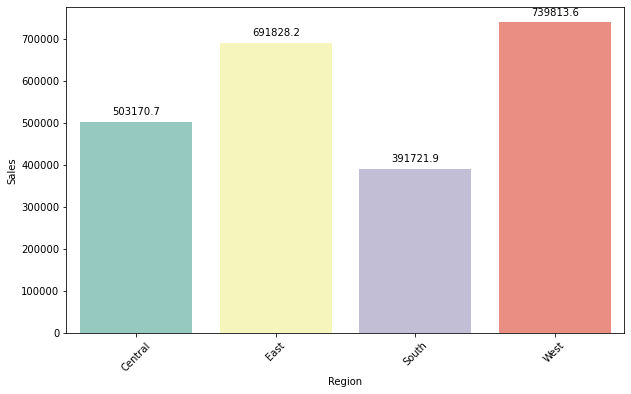

In [172]:
# Plot total sales by region
plt.figure(figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

ax=sns.barplot(x='Region', y='Sales', data=sales, estimator=sum, ci=None,palette = 'Set3')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()



In [159]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Year', 'Location'],
      dtype='object')

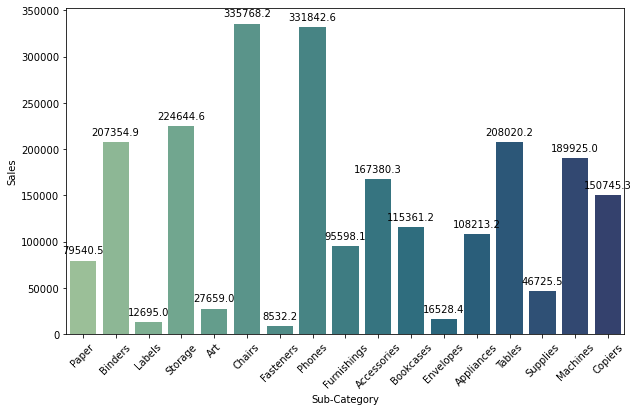

In [168]:
# Plot total sales by region
plt.figure(figsize=(10, 6))
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

ax=sns.barplot(x='Sub-Category', y='Sales', data=sales, estimator=sum, ci=None,palette = 'crest')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()

